## Plotting 

In [2]:
import json
import numpy as np
import seaborn as sns
import glob
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
save_dir = '/home/hanna/MS-suppl/files/'
files = glob.glob(save_dir + '*smaller*.json')

In [4]:
def get_dict_with_all_keys():
    ex_fil = glob.glob(save_dir + '*ERA5*.json')
    ex_fil = np.sort(ex_fil)[:-1]
    merged_dict = {}
    for fil in ex_fil:
        with open(fil, 'r') as f:
            data_grid = json.load(f)
        merged_dict.update(data_grid)   
    return merged_dict

In [5]:
data = get_dict_with_all_keys()

In [6]:
data.keys()

dict_keys(['30.0', '30.25', '30.5', '30.75', '31.0', '31.25', '31.5', '31.75', '32.0', '32.25', '32.5', '32.75', '33.0', '33.25', '33.5', '33.75', '34.0', '34.25', '34.5', '34.75', '35.0', '35.25', '35.5', '35.75', '36.0', '36.25', '36.5', '36.75', '37.0', '37.25', '37.5', '37.75', '38.0', '38.25', '38.5', '38.75', '39.0', '39.25', '39.5', '39.75', '40.0', '40.25', '40.5', '40.75', '41.0', '41.25', '41.5', '41.75', '42.0', '42.25', '42.5', '42.75', '43.0', '43.25', '43.5', '43.75', '44.0', '44.25', '44.5', '44.75', '45.0', '45.25', '45.5', '45.75', '46.0', '46.25', '46.5', '46.75', '47.0', '47.25', '47.5', '47.75', '48.0', '48.25', '48.5', '48.75', '49.0', '49.25', '49.5', '49.75', '50.0'])

In [7]:
data['30.0'].keys()

dict_keys(['-15.0', '-14.75', '-14.5', '-14.25', '-14.0', '-13.75', '-13.5', '-13.25', '-13.0', '-12.75', '-12.5', '-12.25', '-12.0', '-11.75', '-11.5', '-11.25', '-11.0', '-10.75', '-10.5', '-10.25', '-10.0', '-9.75', '-9.5', '-9.25', '-9.0', '-8.75', '-8.5', '-8.25', '-8.0', '-7.75', '-7.5', '-7.25', '-7.0', '-6.75', '-6.5', '-6.25', '-6.0', '-5.75', '-5.5', '-5.25', '-5.0', '-4.75', '-4.5', '-4.25', '-4.0', '-3.75', '-3.5', '-3.25', '-3.0', '-2.75', '-2.5', '-2.25', '-2.0', '-1.75', '-1.5', '-1.25', '-1.0', '-0.75', '-0.5', '-0.25', '0.0', '0.25', '0.5', '0.75', '1.0', '1.25', '1.5', '1.75', '2.0', '2.25', '2.5', '2.75', '3.0', '3.25', '3.5', '3.75', '4.0', '4.25', '4.5', '4.75', '5.0', '5.25', '5.5', '5.75', '6.0', '6.25', '6.5', '6.75', '7.0', '7.25', '7.5', '7.75', '8.0', '8.25', '8.5', '8.75', '9.0', '9.25', '9.5', '9.75', '10.0', '10.25', '10.5', '10.75', '11.0', '11.25', '11.5', '11.75', '12.0', '12.25', '12.5', '12.75', '13.0', '13.25', '13.5', '13.75', '14.0', '14.25', '14.5

In [8]:
import seaborn as sns

In [9]:
coords_files = glob.glob("/home/hanna/MS-suppl/files/*.nc")

In [10]:
coords_files

['/home/hanna/MS-suppl/files/fixed_lon.nc',
 '/home/hanna/MS-suppl/files/coordinates.nc',
 '/home/hanna/MS-suppl/files/fixed_lat.nc']

In [11]:
coords = xr.open_dataset(coords_files[0])

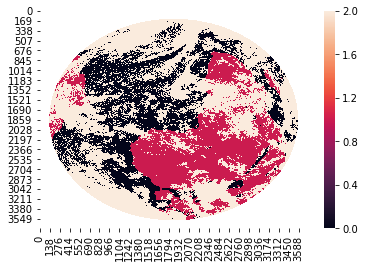

In [20]:
sns.heatmap(coords.cloudMask.values)

In [12]:
lat = coords.latitude.values.reshape(-1)
lon = coords.longitude.values.reshape(-1)

In [13]:
y_dim =  len(data.keys())
x_dim =  len(data['30.0'].keys())

In [14]:
app_lon = []
app_lat = []

for lat_key, item in data.items():
    for lon_key, item2 in item.items():
        if lon_key <= '25.0':
            centre_index = item2['centre']['index']    
            assert len(centre_index) != 0, "lat {} lon {}, centre length {}".format(lat_key, lon_key, len(centre_index))

            app_lon.append(np.mean(lon[centre_index]))
            app_lat.append(np.mean(lat[centre_index]))

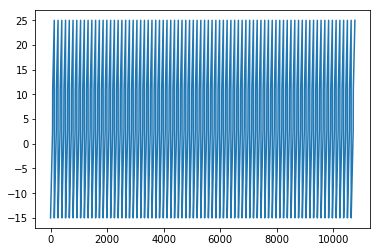

In [15]:
plt.plot(app_lon)

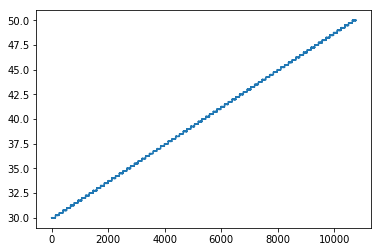

In [16]:
plt.plot(app_lat)

In [33]:
import seaborn as sns

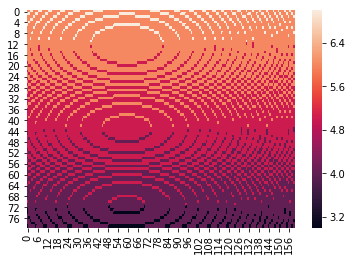

In [34]:
sns.heatmap( right )

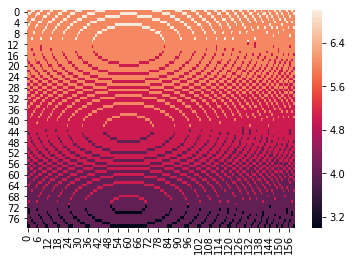

In [35]:
sns.heatmap( left )

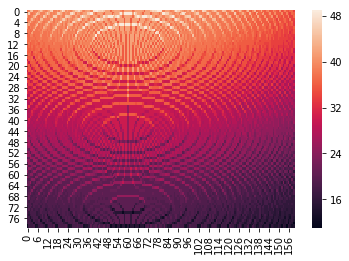

In [36]:
sns.heatmap( centre )

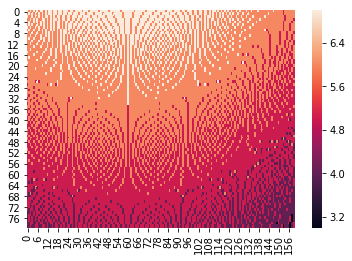

In [37]:
sns.heatmap( down )

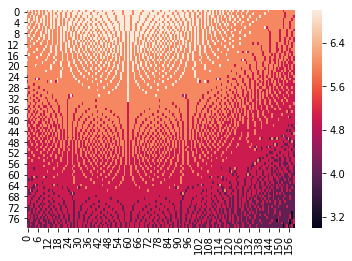

In [38]:
sns.heatmap( up )

In [39]:
sumsum = left+right+centre+up+down

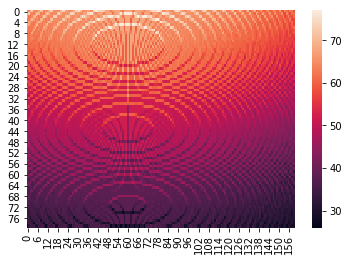

In [40]:
sumsum = left+right+centre+up+down
sns.heatmap(sumsum)